In [ ]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.performance._benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType, do_full_pipeline_benchmarks, \
    PipelineBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

from IPython.utils import io

import warnings
warnings.filterwarnings('ignore')

Defined plot_runtimes, example output:


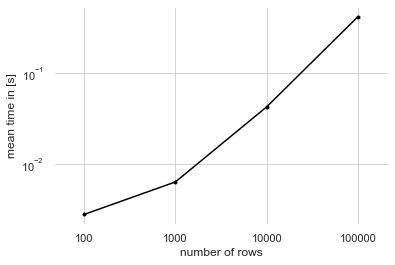

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


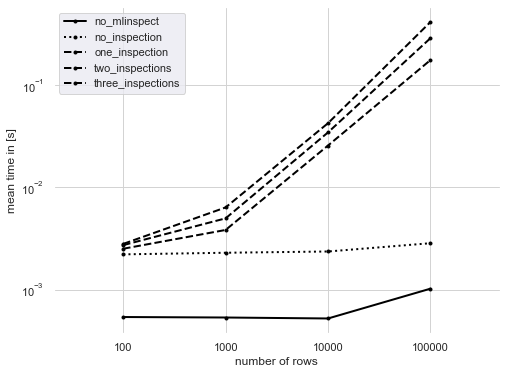

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

Defined box_plot_full_pipeline_results, example output:


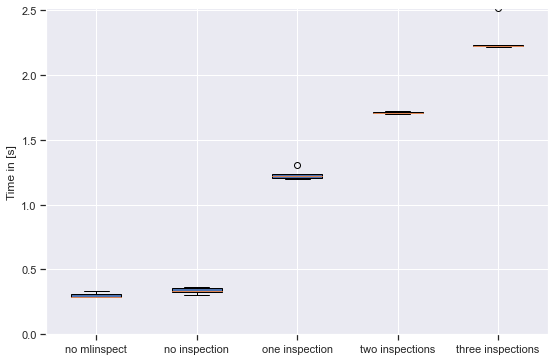

In [4]:
def box_plot_full_pipeline_results(benchmark_results, name, save_to_file=False):    
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    data_to_plot = benchmark_results.values()
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    #for box in bp['boxes']:
    #    # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        # change fill color
    #    box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    #for whisker in bp['whiskers']:
    #    whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    #for cap in bp['caps']:
    #    cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    #for median in bp['medians']:
    #    median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
    #    flier.set(marker='o', color='#e7298a', alpha=0.5)
        
    ## Custom x-axis labels
    ax.set_xticklabels(benchmark_results.keys())
    
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    ax.set_ylabel('Time in [s]')
    
    ax.autoscale(enable=True, tight=True)
    ax.set_ylim([0.0, None])

    # Save the figure
    if save_to_file:
        fig.savefig(result_file_name + '.svg', bbox_inches='tight')
    plt.show()
    plt.close()

print('Defined box_plot_full_pipeline_results, example output:')
test_benchmark_results = {
    "no mlinspect": [0.3328154240000458, 0.29041089500003636, 0.28595826900004795, 0.30949507700006507, 0.2908414740001035],
    "no inspection": [0.3638599429999658, 0.334859200999972, 0.35457435500006795, 0.3023559349999232, 0.3244804189999968],
    "one inspection": [1.1991266320000022, 1.2222170320000032, 1.309182582999938, 1.2018000110000457, 1.2360804480000525],
    "two inspections": [1.720092654000041, 1.7146672159999525, 1.7053870940000024, 1.7045333490000303, 1.7027777409999771],
    "three inspections": [2.2129864439999665, 2.2243778859999566, 2.2320164879999993, 2.2251516389999324, 2.5162970650000034]
}
box_plot_full_pipeline_results(test_benchmark_results, "test_box_plot_full_pipeline_results")

In [5]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [6]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [7]:
def benchmark_full_pipeline_and_plot_result(pipeline: PipelineBenchmarkType, repeats):
    print("Full Pipeline Execution Results for {}".format(pipeline.value))
    with io.capture_output() as captured:
        benchmark_results = do_full_pipeline_benchmarks(pipeline, repeats)
    mean_benchmark_results = {}
    for label, results in benchmark_results.items():
        mean_benchmark_results[label] = statistics.mean(results)
        
    print("Results")
    for label, results in benchmark_results.items():
        print("{}: {}".format(label, results))

    print("Mean Results")
    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
        
    box_plot_full_pipeline_results(benchmark_results, pipeline.value)

In [8]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
##row_numbers = [100, 1000, 10000, 100000, 1000000]

repeats = 1
#repeats = 5
#repeats = 15
##repeats = 20

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstOutputRows(10)": "dotted", 
    "RowLineage(10)": "dashed", 
    "HistogramForColumns(['group_col_1'])": "dashdot",
    "HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0008040240500000184, 0.000499837949999904, 0.0006477845000001814, 0.0007440072500002337, 0.001882377449998529]
no inspection: [0.002757522999999962, 0.002369457749999837, 0.0022142243000002892, 0.0022038865499995454, 0.00335973390000035]
one inspection: [0.002900820400000015, 0.005083221100000079, 0.020880337849999986, 0.18497473644999954, 1.8678600277999977]
two inspections: [0.0029808910499999454, 0.006311845250000036, 0.03374685754999973, 0.2874673355999999, 2.9079281579999927]
three inspections: [0.003143892249999958, 0.007604889800000158, 0.04145836999999997, 0.3876918756499993, 3.884691765600016]


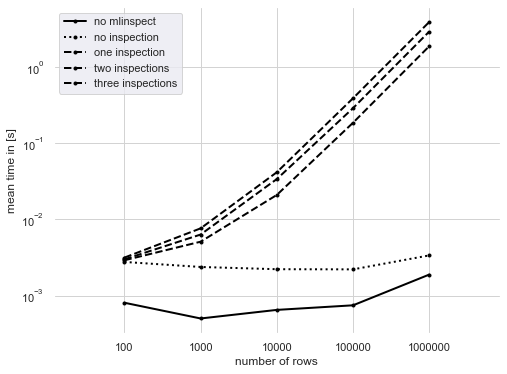

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles, repeats)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0006506089999845699, 0.00042019605000405137, 0.0006531128000005993, 0.002393796199993403, 0.02712441270000454]
no inspection: [0.004949021299989908, 0.004916312900007824, 0.0058290629000055105, 0.019384351200005766, 0.18856393830000684]
one inspection: [0.008488004750000755, 0.01143971924999505, 0.04097662679998848, 0.33844700574999254, 3.592716785850013]
two inspections: [0.00918811054997377, 0.013243184450004719, 0.05707656699997869, 0.496307839450003, 5.163665968449988]
three inspections: [0.009469473350009139, 0.014743200950005076, 0.07247288445000208, 0.6385599858500086, 6.637648942650003]


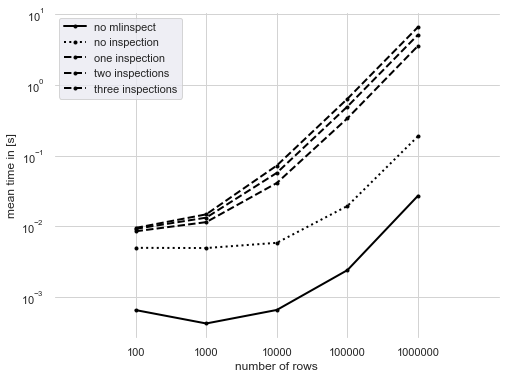

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles, repeats)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0021747157500385584, 0.0016978625500087218, 0.003366616850007631, 0.018926643350005178, 0.3592413209000142]
no inspection: [0.006126062450016434, 0.006233858850021079, 0.010416062000001603, 0.05813834279998673, 0.7815353447999882]
one inspection: [0.01373332675000256, 0.01716638485002022, 0.05506339654996282, 0.46236772630002176, 5.095696098200017]
two inspections: [0.014022900050008502, 0.01846133090006106, 0.07028183140001829, 1.4857977721499878, 7.7672605234]
three inspections: [0.014109336299975439, 0.020861977350023153, 0.08290255529998376, 0.7659172879999915, 8.387743835749939]


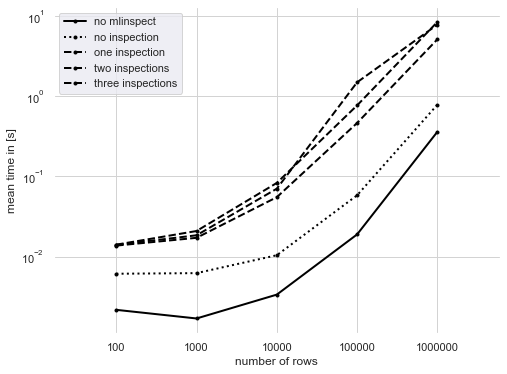

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles, repeats)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0005326065000417657, 0.0006801755000196863, 0.0021670466000387025, 0.016496808100032467, 0.19048951035001666]
no inspection: [0.0020692737999979728, 0.0019985765000001265, 0.003459562700027163, 0.017649522299961973, 0.18969062634994316]
one inspection: [0.002229076600019653, 0.0036017743999764208, 0.016861599350045255, 0.2223848831000396, 1.5218177943000455]
two inspections: [0.0023305359001369653, 0.004435571450039788, 0.02691174450003473, 1.204822504900062, 2.639679504550031]
three inspections: [0.0024637534500016045, 0.005631032100063748, 0.0368404332999944, 0.750850510949931, 3.48753029114996]


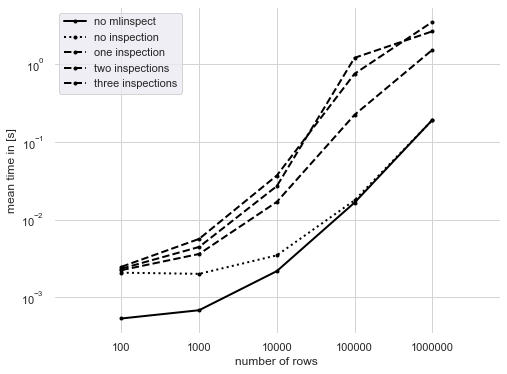

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles, repeats)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0028337938499589654, 0.002497656100013046, 0.00222187154997755, 0.0027389532499910276, 0.01738922960000764]
no inspection: [0.0036857145499652687, 0.0036089261999450173, 0.003406345400048849, 0.0042107775499744095, 0.01736353070007226]
one inspection: [0.0038703955500750454, 0.005146010599969486, 0.01760187239997322, 0.1406925819500202, 1.3930442196499826]
two inspections: [0.0038747001000274395, 0.006205092150025848, 0.02697432939992268, 0.2403882109500728, 2.552601208449937]
three inspections: [0.004025710849987263, 0.007086822299970663, 0.035917939649948494, 0.3477788924000606, 3.3433446760499463]


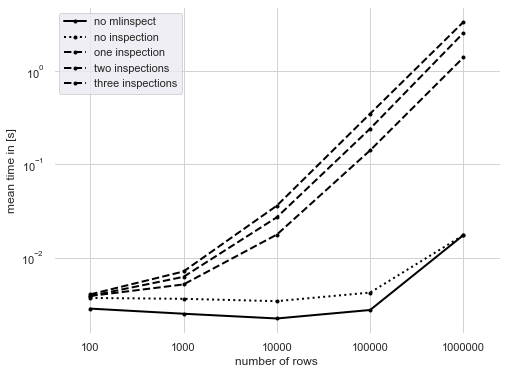

In [13]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles, repeats)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
no mlinspect: [0.0031019095500141704, 0.012078412699997898, 0.0696504994999941, 0.6298229212500474, 11.113291937750024]
no inspection: [0.004955132400073126, 0.014786690899950373, 0.07058684309995442, 0.6230685173498841, 10.916594213050008]
one inspection: [0.008687000799955057, 0.024000484949988278, 0.13794140255004095, 1.3277876721499524, 17.938227025199968]
two inspections: [0.01025872020004499, 0.02759884160002457, 0.16072031145001803, 1.5676156197999263, 22.562261898099813]
three inspections: [0.011163732400041227, 0.02631545474998802, 0.16302389164995928, 1.656841154549943, 22.253942664050008]


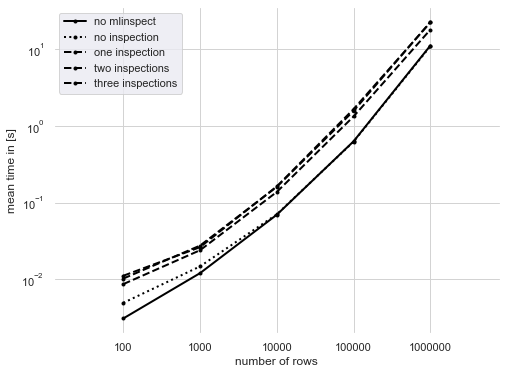

In [14]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles, repeats)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.002635060899956443, 0.00402977685002952, 0.020532043949970102, 0.18280836509993606, 1.8824531685001147]
MaterializeFirstOutputRows(10): [0.0026367633000518253, 0.004448153849989467, 0.021246845200039388, 0.1908421167000597, 2.0097095618999448]
RowLineage(10): [0.0031062986000506498, 0.004633655350062327, 0.022005771400063167, 0.20557178509998267, 2.033585802149946]
HistogramForColumns(['group_col_1']): [0.0023727753000912346, 0.004440940549920924, 0.026301905450100093, 0.2443927226998767, 2.4958954501000337]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.0025262067500079867, 0.005062226699874372, 0.03293794315013656, 0.31053886644990597, 3.1622374987499824]


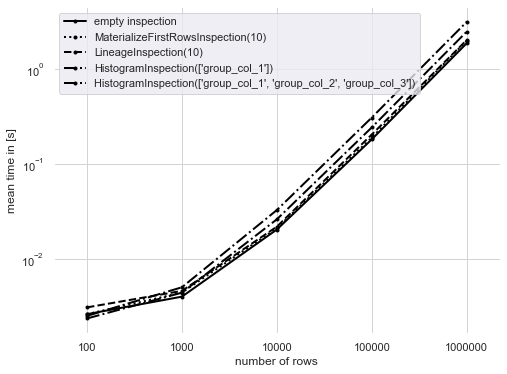

In [15]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles, repeats)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.009072599200135301, 0.011957520400255817, 0.04469603500006088, 0.3667375449499559, 3.551865809150013]
MaterializeFirstOutputRows(10): [0.009979877400064651, 0.012351385199826837, 0.05031745069991302, 0.35996333334992414, 3.7103067093999016]
RowLineage(10): [0.010508345049993295, 0.013315405799949076, 0.04937763954985712, 0.39232882634992167, 4.018690019700034]
HistogramForColumns(['group_col_1']): [0.008423601949971271, 0.014300728699936371, 0.05810032459989998, 0.4440578739500779, 4.607665120400133]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.008411999649979407, 0.014270780449987797, 0.06416713520002304, 0.5424821154998881, 5.593669353849964]


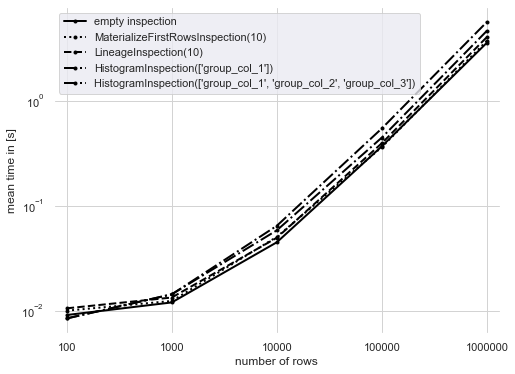

In [16]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles, repeats)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.014423830400028237, 0.017475397250018433, 0.056095703750042955, 0.4680165685998873, 5.2001842311000015]
MaterializeFirstOutputRows(10): [0.014553228650083839, 0.017836579049981083, 0.05770037030006279, 0.47989767274998485, 5.328487446400004]
RowLineage(10): [0.01450157649983339, 0.01872113650006213, 0.06551054645001386, 0.6416535091500464, 7.061299631300017]
HistogramForColumns(['group_col_1']): [0.013365260399996259, 0.017308848400080023, 0.06039622225002859, 0.5866915070500454, 6.099461720449881]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.013379860850000114, 0.018440043800137574, 0.06932004510003935, 0.6740230608501406, 7.208128838149969]


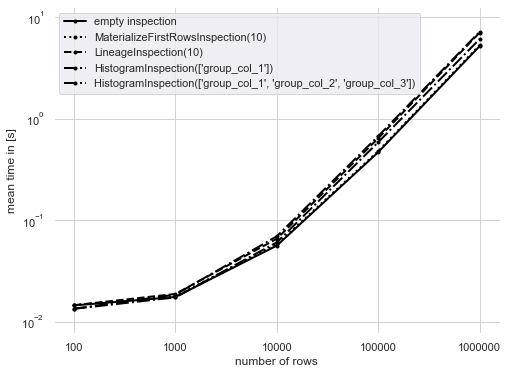

In [17]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles, repeats)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
Done: 1000000
empty inspection: [0.0024598719500318112, 0.003774598800282547, 0.017071439000210374, 0.14960703059987282, 1.4970106708999082]
MaterializeFirstOutputRows(10): [0.002552592700249079, 0.004273921250114654, 0.018129343949840403, 0.15984309524992568, 1.5920477739497982]
RowLineage(10): [0.0027976277498964917, 0.004170487400006096, 0.01890279270028259, 0.17378475015011646, 1.7111319257001925]
HistogramForColumns(['group_col_1']): [0.0022479930002191396, 0.004111541699785448, 0.02328672559997358, 0.21500150849979036, 2.133781424800145]
HistogramForColumns(['group_col_1', 'group_col_2', 'group_col_3']): [0.002309747900017101, 0.004776733949802292, 0.03007852484988689, 0.28097924890016657, 2.8151758777505167]


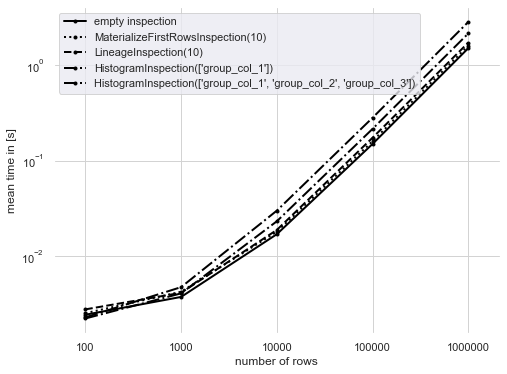

In [18]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles, repeats)

Full Pipeline Execution Results for healthcare (1000 rows)
Results
no mlinspect: [1.2545139020003262, 0.9119398170005297, 0.9154253159995278, 0.9081059580003057, 0.9053192119990854, 0.9138988249997055, 0.9069487090000621, 0.9078523819989641, 0.9091243889997713, 0.9054630270002235, 0.9068165640001098, 0.9086062770002172, 0.9047936940005457, 0.9168704650001018, 0.9011218070008908, 0.9078245500004414, 0.9132200240001112, 0.9058635010005673, 0.90463177699894, 0.9084363319998374]
no inspection: [1.0418958829995972, 0.9904334479997488, 0.9864590010001848, 0.9847183969995967, 0.9853331390004314, 0.9826191499996639, 1.157914884001002, 1.048715892000473, 1.0277323299997079, 1.025109963999057, 1.0633396390003327, 1.033880102000694, 1.143345460999626, 1.1295859269994253, 0.9992265000000771, 0.9924235090002185, 1.0022048650007491, 0.996786391000569, 0.9909046319990011, 0.994004746000428]
one inspection: [1.0686770669999532, 1.066183397999339, 1.0731156900001224, 1.0602864069987845, 1.0697955739997

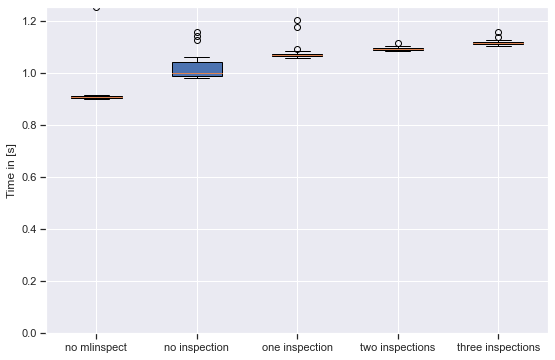

In [19]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.HEALTHCARE, repeats)

Full Pipeline Execution Results for compas (train: 5050 rows, test: 2166)
Results
no mlinspect: [0.13900163200014504, 0.09388687800128537, 0.0911100350003835, 0.09295028399901639, 0.09449235100146325, 0.09488927699931082, 0.08909967300132848, 0.08925160099897766, 0.09144269799980975, 0.09067033099927357, 0.09249903199997789, 0.09141306300080032, 0.09503352499996254, 0.09182758199858654, 0.09864459599884867, 0.09779906999938248, 0.09183788900008949, 0.09143310800027393, 0.09205440400000953, 0.0916241800005082]
no inspection: [0.15310278200013272, 0.15715202399951522, 0.15746665199912968, 0.160792886001218, 0.15438978999918618, 0.15857613300067896, 0.14922591200047464, 0.15500498099936522, 0.1579521149997163, 0.15676406000056886, 0.14901412499966682, 0.15589445299883664, 0.1493049559994688, 0.15139294999971753, 0.15865032299916493, 0.16126488100053393, 0.160209969000789, 0.16046825599914882, 0.15993865299969912, 0.1604051790000085]
one inspection: [0.5644350399998075, 0.5837446759996965,

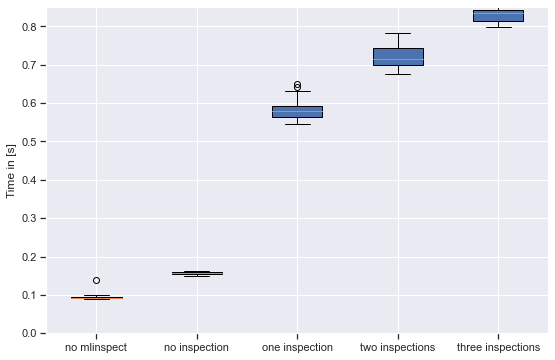

In [20]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.COMPAS, repeats)

Full Pipeline Execution Results for adult_easy (22793 rows)
Results
no mlinspect: [0.30262469700028305, 0.2577480410000135, 0.2536589190003724, 0.2559010999993916, 0.2659754409996822, 0.2607161010000709, 0.26062738099972194, 0.26224437200107786, 0.2590840039993054, 0.25812505000067176, 0.25391900099930353, 0.25610963399958564, 0.2567294700002094, 0.2560777800008509, 0.25185828899884655, 0.2608052489995316, 0.2561526250010502, 0.25424822199966, 0.2544263489999139, 0.2548237450009765]
no inspection: [0.2887023669991322, 0.287684115999582, 0.2864165309983946, 0.28717316199981724, 0.28774693900049897, 0.2876014209996356, 0.2857169740000245, 0.2892363259998092, 0.290336305000892, 0.2898129360000894, 0.2894131049997668, 0.28548177300035604, 0.2866264609983773, 0.2870067889998609, 0.2875809149991255, 0.28797678999944765, 0.2888153969997802, 0.28958825199879357, 0.2882388819998596, 0.29634361199896375]
one inspection: [1.315862344999914, 1.327257003998966, 1.2605629339996085, 1.294402367000657

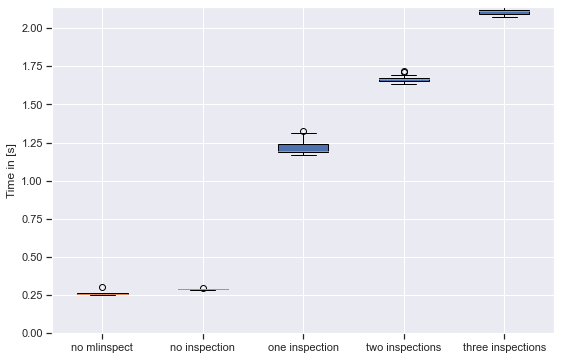

In [21]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_SIMPLE, repeats)

Full Pipeline Execution Results for adult_normal (train: 22793 rows, test: 9770 rows)
Results
no mlinspect: [0.5336141349998798, 0.4284717479986284, 0.4443357959989953, 0.7257535999997344, 0.5556746929996734, 0.6154454279985657, 0.428496278998864, 0.4289745630012476, 0.566329721999864, 0.4333468859986169, 0.5872114630001306, 0.4246032169994578, 0.4257708620007179, 0.4263992350006447, 0.4337871269999596, 0.4327404320010828, 0.425797894000425, 0.4403121680006734, 0.5356555420003133, 0.5026723230002972]
no inspection: [0.49786510299963993, 0.5446357310011081, 0.4725734759995248, 0.5172841339990555, 0.4937048699994193, 0.5173882229992159, 0.4717070759998023, 0.45920297500015295, 0.4748084890015889, 0.47095061400068516, 0.534687154000494, 0.5484362520001014, 0.545625700000528, 0.525014631999511, 0.5410623359985038, 0.5400544509993779, 0.4955842819999816, 0.4743022229995404, 0.4949621030009439, 0.46885479600132385]
one inspection: [1.428531542998826, 1.4212913640003535, 1.451953590998528, 1.

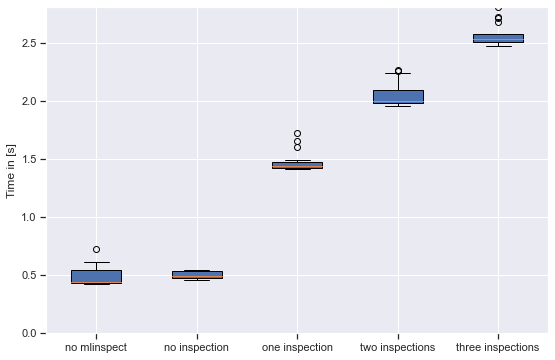

In [22]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_COMPLEX, repeats)